## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, how='right', on='Mouse ID')
study_data.to_csv('study_data.csv', index=False)


# Display the data table for preview study_data
study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
import numpy as np

len(study_data ['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#create a subset
duplicate_mice= study_data[study_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
360,g989,Propriva,Female,21,26,5,47.570392,0
681,g989,Propriva,Female,21,26,10,49.880528,0
869,g989,Propriva,Female,21,26,15,53.442020,0
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
#Get all the data for the duplicate mouse ID. 
all_dup=study_data[study_data.duplicated(['Mouse ID'])]
all_dup

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.000000,0
250,a275,Ceftamin,Female,20,28,5,46.795257,0
251,w575,Zoniferol,Female,16,28,5,48.913860,1
252,x822,Ceftamin,Male,3,29,5,45.671104,1
253,l509,Capomulin,Male,17,21,5,45.851193,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=study_data.drop_duplicates('Mouse ID')
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
...,...,...,...,...,...,...,...,...
245,t565,Capomulin,Female,20,17,0,45.0,0
246,i557,Capomulin,Female,1,24,0,45.0,0
247,m957,Capomulin,Female,3,19,0,45.0,0
248,f966,Capomulin,Male,16,17,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stddv= study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summ_stats = pd.DataFrame ({"Tumor Volume Mean": mean, "Tumor Volume Median":median, "Tumor Volume Variance":variance, 
                            " Tumor Volume Standard Deviation":stddv, "Tumor Volume SEM":sem})
summ_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats2=study_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Using the aggregation method, produce the same summary statistics in a single line
summ_stats2.agg(['mean', 'median', 'var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Measurements Taken')

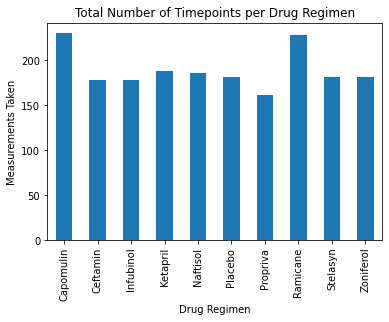

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pd_bar_plot= pd.DataFrame(study_data.groupby(['Drug Regimen']).count()).reset_index()
pd_barplot = pd_bar_plot[["Drug Regimen", 'Mouse ID']]
pd_barplot.plot.bar(x='Drug Regimen', title = 'Total Number of Timepoints per Drug Regimen', legend = False)
plt.xlabel('Drug Regimen')
plt.ylabel("Measurements Taken")

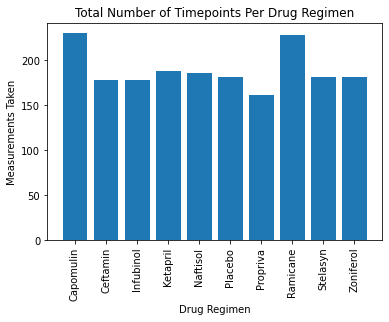

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = summ_stats.index.tolist()
#x_axis
y_axis = (study_data.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
#y_axis
plt.bar(x_axis, y_axis, align="center")
plt.xticks(x_axis, rotation='vertical')
plt.title('Total Number of Timepoints Per Drug Regimen')
plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")
plt.show()

Text(0, 0.5, '')

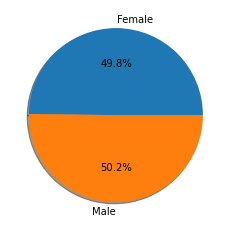

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data=pd.DataFrame(clean_data.groupby(['Sex']).count())
#gender_data.head()
gender_data.plot.pie(y='Mouse ID', autopct='%1.1f%%',legend=False, shadow=True )
plt.title= ("Gender Distribution")
plt.ylabel("")

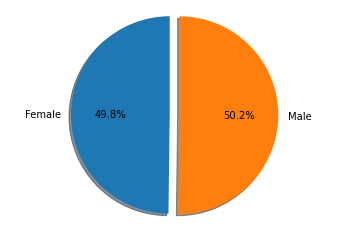

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Female', 'Male'
sizes = [124, 125]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


## Quartiles, Outliers and Boxplots

In [75]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp= study_data.groupby('Mouse ID').max()['Timepoint']
last_tp_df=pd.DataFrame(last_tp)
#last_tp_df.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_meas= pd.merge(last_tp_df, study_data, how='left', on=['Timepoint', 'Mouse ID'])
final_meas

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,10,z435,Propriva,Female,12,26,48.710661,0
245,45,z578,Ramicane,Male,11,16,30.638696,0
246,45,z581,Infubinol,Female,24,25,62.754451,3
247,45,z795,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=[]
for drug in drugs:


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
